# 1. Importing Dependencies

In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading the Data set


In [85]:
df = pd.read_csv('train.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [86]:
#setting display Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('axes', titlesize=15)

# 3. EDA and Data Wrangling

### 3.1 Understanding The Data

In [87]:
df.shape

(100000, 28)

In [88]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [89]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


Note : ID, Customer_ID, SSN can be considered redundant since each of them represents a unique value. We will remove
two out of the three and keep only SSN. Name column will be removed as well due to its non relevance. 

In [90]:
df.drop(['ID','Customer_ID','Name'],axis=1,inplace=True)

In [91]:
df.dtypes

Month                        object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

Note : Categorical features exists hence encoding will be needed for selected

In [92]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [93]:
# Trying to understand more about the target variable
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

Text(0.5, 1.0, 'Credit Score Categories')

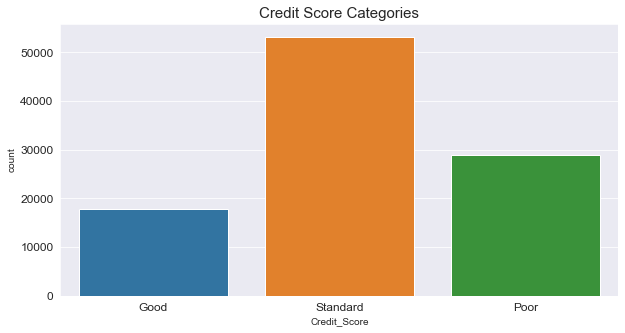

In [94]:
plt.rcParams["figure.figsize"] = (10,5)
sns.set_style('darkgrid')
sns.countplot(data = df, x=df["Credit_Score"])
plt.title("Credit Score Categories")
plt.show()

Note : Credit score of 'Standard' has higher number of values compared to other two making this an inbalanced feature. 
We can undersample to make the ratios equal but to observe the initial accuracies, we will not undersample and proceed as it is.

### 3.2 Checking for Missing Values

In [151]:
#Checking for null value percentage with respect to total entries
round(df.isnull().mean()*100,0)

Month                        0.0
Age                          0.0
SSN                          0.0
Occupation                   0.0
Annual_Income                0.0
Monthly_Inhand_Salary        0.0
Num_Bank_Accounts            0.0
Num_Credit_Card              0.0
Interest_Rate                0.0
Num_of_Loan                  0.0
Type_of_Loan                11.0
Delay_from_due_date          0.0
Num_of_Delayed_Payment       7.0
Changed_Credit_Limit         0.0
Num_Credit_Inquiries         2.0
Credit_Mix                   0.0
Outstanding_Debt             0.0
Credit_Utilization_Ratio     0.0
Credit_History_Age           9.0
Payment_of_Min_Amount        0.0
Total_EMI_per_month          0.0
Amount_invested_monthly      4.0
Payment_Behaviour            0.0
Monthly_Balance              1.0
Credit_Score                 0.0
dtype: float64

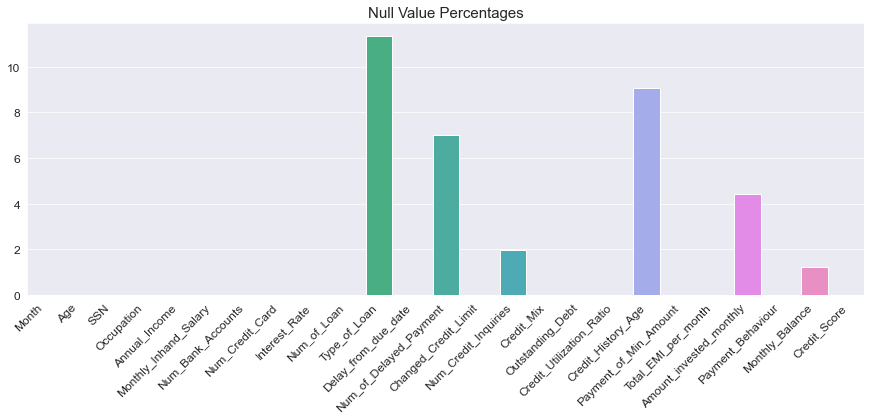

In [169]:
x = df.isnull().mean()*100

plt.rcParams["figure.figsize"] = (15,5)

plt.xticks(rotation=45, ha='right')
plt.title("Null Value Percentages")
sns.set_style("darkgrid")
sns.barplot(x = df.columns , y=x)
plt.show()

Note: Since some of the columns will be dropped due to correlation, we will deal with the missing values in a latter stage.

## ####################################################################################################################

##### 3.2.1 'Monthly_Inhand_Salary

Note : The highest missing value percentage accounts for the Monthly_Inhand_Salary feature. We need to look closely at the feature to first understand whether missing value accounts for individuals without a occupation or anyother reason.

In [123]:
#Number of Missing Values
df['Monthly_Inhand_Salary'].isna().sum()

15002

In [124]:
#Number of Entries where both Month in Hand Salary and Occupation are not available
len(df[(np.isnan(df['Monthly_Inhand_Salary'])) & (df['Occupation']=='_______') ])

1060

Note: About 14% of the Month_Inhand_Salary null values does not account for an occupation. This concludes that majority of them has a occupation which implies that it is an error in recording the specific feature which resulted in significant null values. 

In [152]:
df = df[df['Monthly_Inhand_Salary'].notna()]

## ####################################################################################################################

In [ ]:
## ####################################################################################################################

# 4. Plotting

### 4.1 Numerical Columns

In [153]:
# Getting the Numerical Features
df._get_numeric_data().columns

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')

#### 4.1.1. Understanding the Distributions of Features

##### 4.1.1.1. Histogram

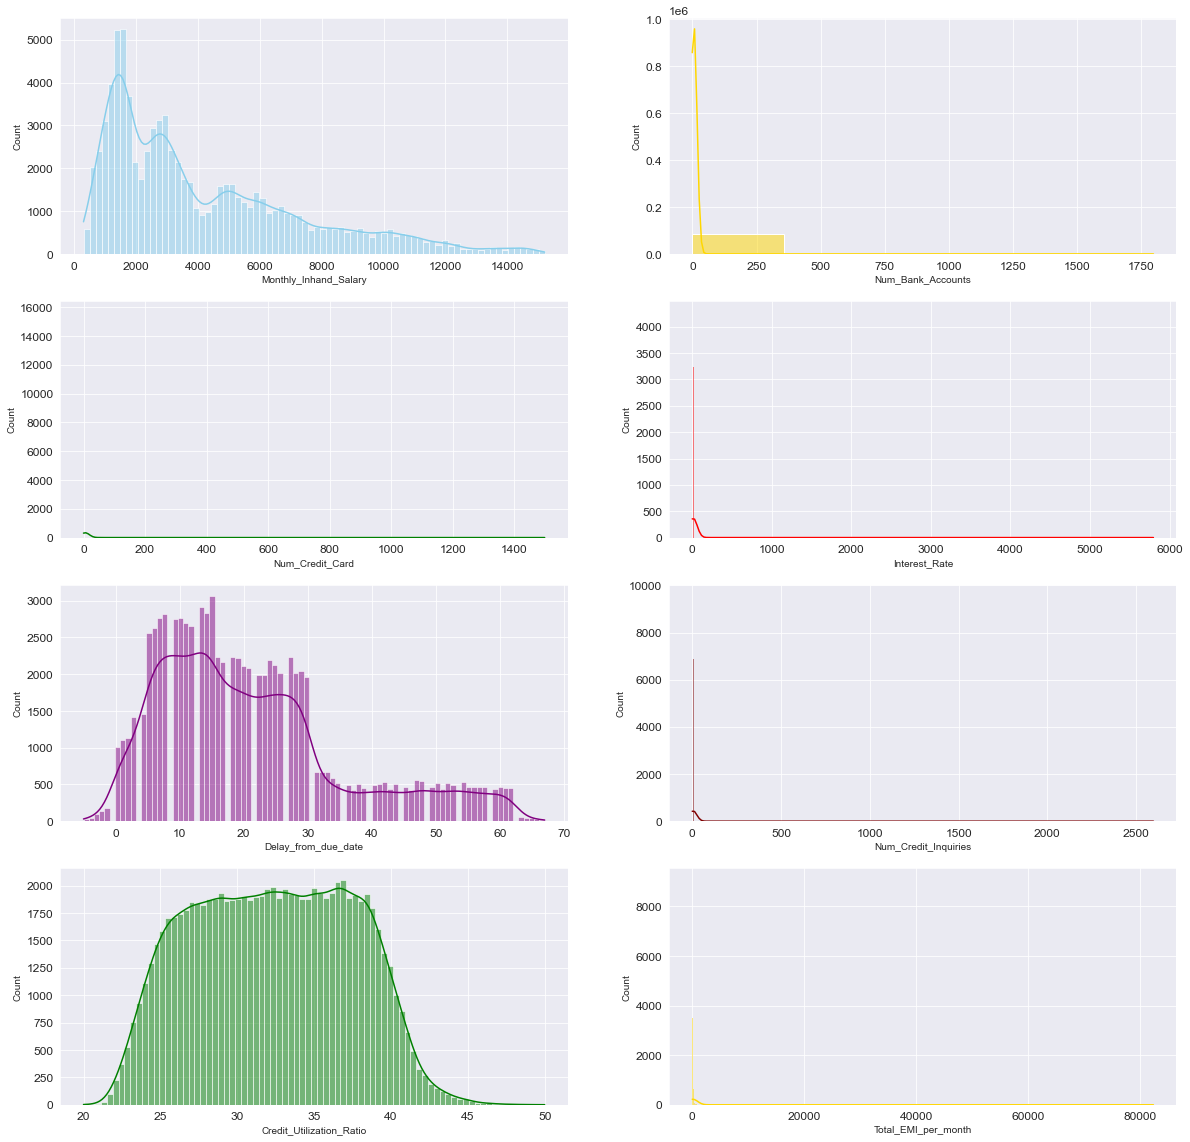

In [154]:
#For all Numerical Features
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

sns.histplot(data=df, x="Monthly_Inhand_Salary", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=df, x="Num_Bank_Accounts", kde=True, color="gold", ax=axs[0,1],bins=5)
sns.histplot(data=df, x="Num_Credit_Card", kde=True, color="Green", ax=axs[1,0])
sns.histplot(data=df, x="Interest_Rate", kde=True, color="red", ax=axs[1,1])
sns.histplot(data=df, x="Delay_from_due_date", kde=True, color="purple", ax=axs[2,0])
sns.histplot(data=df, x="Num_Credit_Inquiries", kde=True, color="maroon", ax=axs[2,1])
sns.histplot(data=df, x="Credit_Utilization_Ratio", kde=True, color="Green", ax=axs[3,0])
sns.histplot(data=df, x="Total_EMI_per_month", kde=True, color="gold", ax=axs[3,1])

plt.show()

Note: We can clearly see that there are many outliers in below features.

1. Num_Bank_Accounts
2. Num_Credit_Card
3. Interest_Rate
4. Num_Credit_Inquiries
5. Total_EMI_per_month

These will be dealth seperately and also the features that are skewed will be log transformed as well.

Text(0.5, 1.0, 'Monthly Inhand Salary by Credit Score')

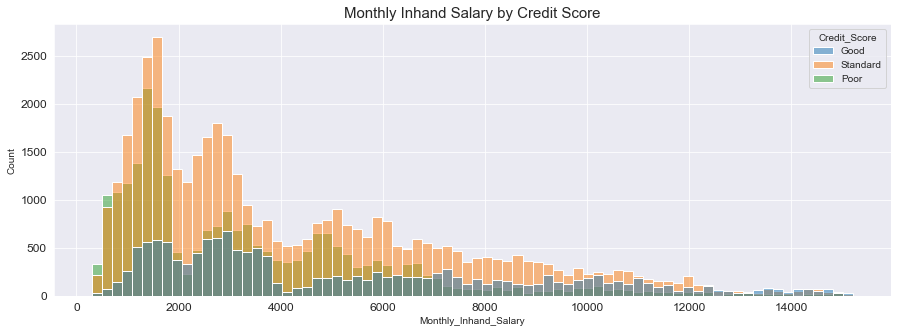

In [155]:
# To understand more on Salary and Credit_Score

sns.histplot(data=df,x=df['Monthly_Inhand_Salary'],hue='Credit_Score')
plt.title('Monthly Inhand Salary by Credit Score')

##### 4.1.1.2. Density Plots

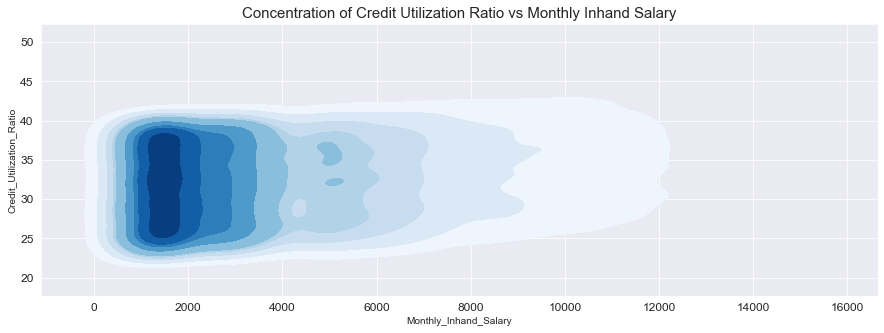

In [168]:
sns.kdeplot(data=df,x=df['Monthly_Inhand_Salary'],y=df['Credit_Utilization_Ratio'],cmap="Blues", shade=True)
plt.title('Concentration of Credit Utilization Ratio vs Monthly Inhand Salary')
plt.show()

#### 4.1.2. Understanding the Relationship between Features

##### 4.1.2.1. Correlogram

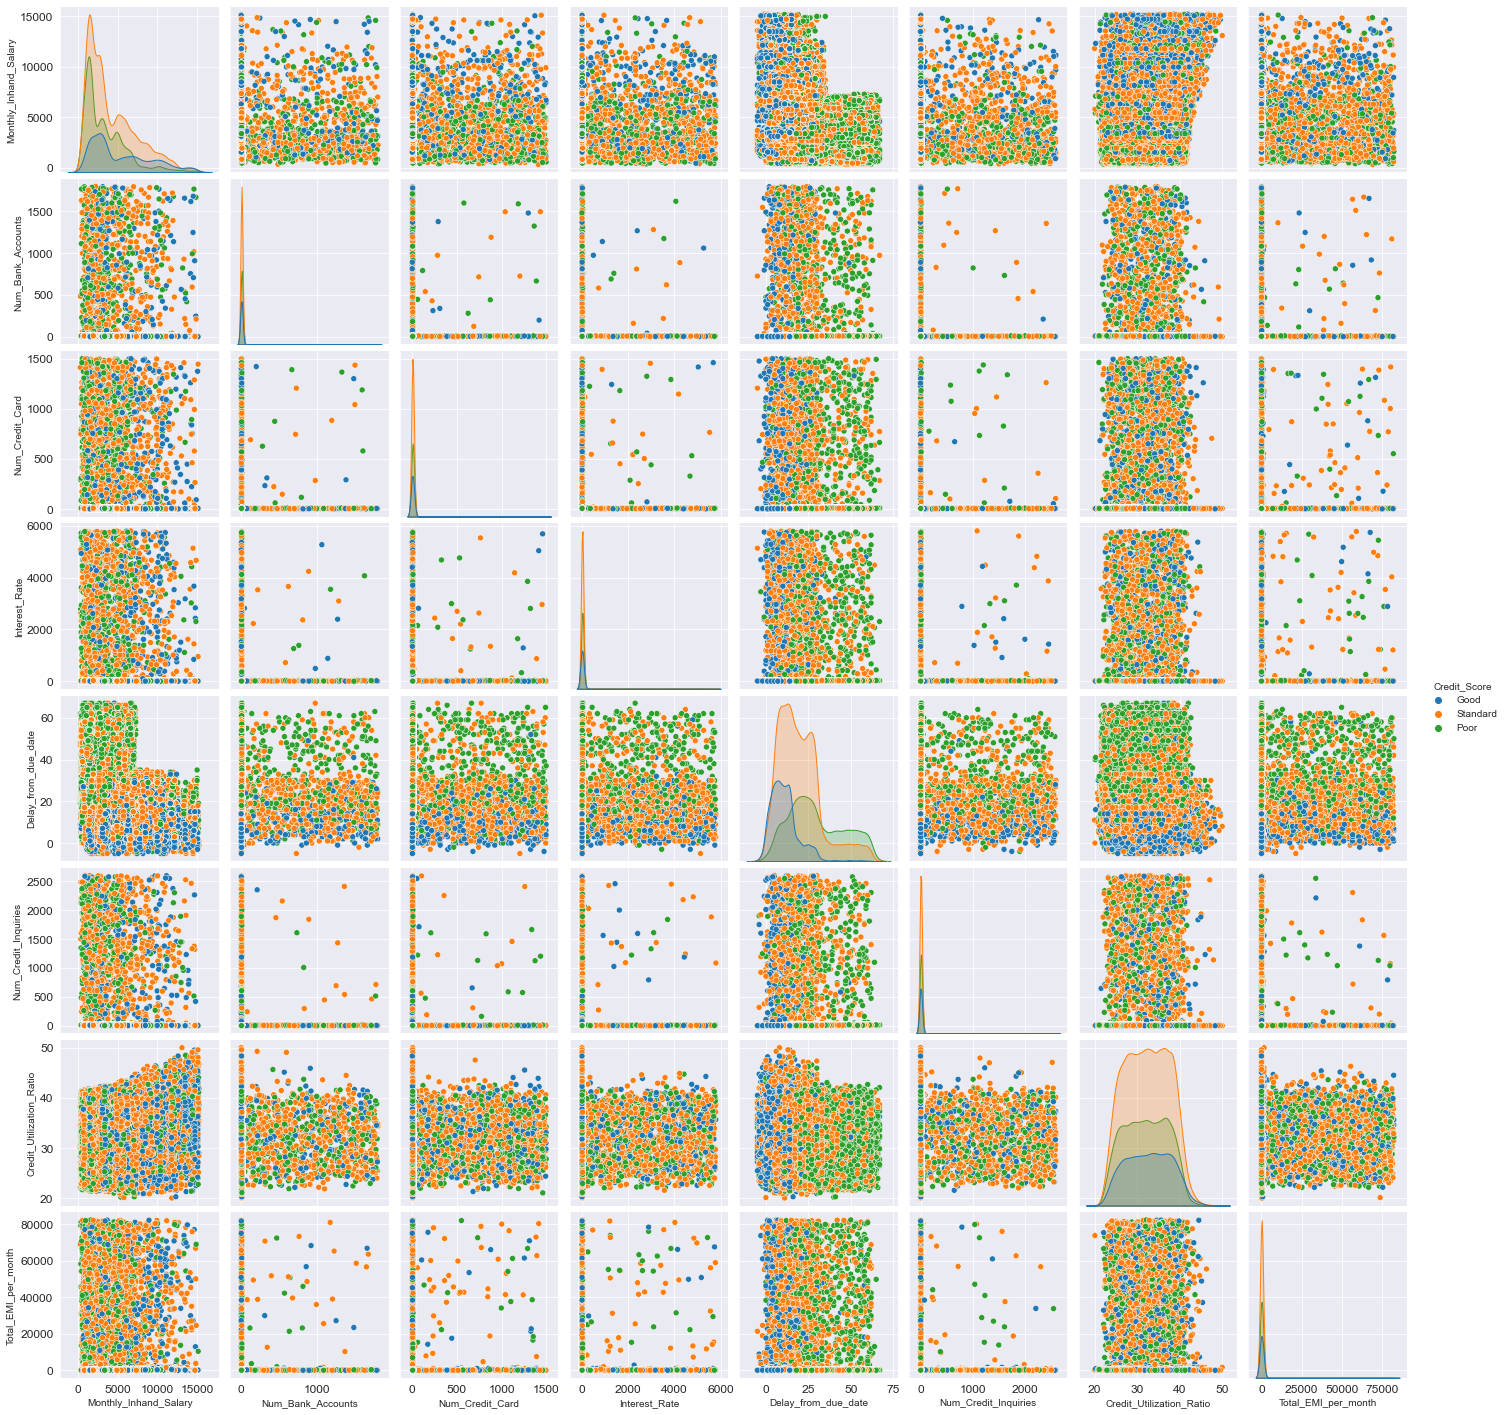

In [156]:
sns.pairplot(data=df, hue="Credit_Score")
plt.show()

Note: We can observe that The Credit Score is clearly seggregated in the Delay_from_due_date feature which implies this feature will have higher significance in predicting the Credit_Score. Other than that no significant correlations can be observed hence we will plot a heatmap with correlation p scores. 

##### 4.1.2.2. Heatmap

In [158]:
corr = df[df._get_numeric_data().columns].corr()
# sns.heatmap(corr, annot=True, fmt=".1f")

<AxesSubplot:>

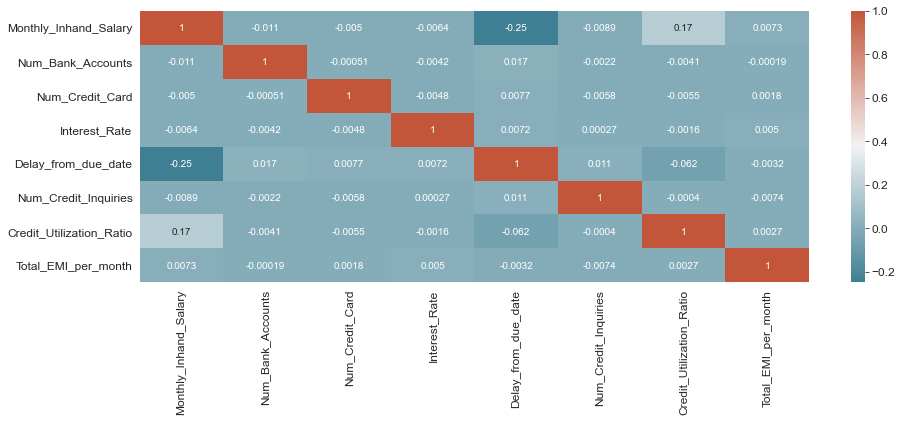

In [159]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

Note: We consider the correlation boundary as similar to industrial standard of 0.3 and -0.3. Accordingly, there are no two features which falls aways from these bounderies. We can solidify the visualized scatterplots in the correlogram of not having significant correlations.

### 4.2 Categorical Columns

In [174]:
df_catagorical=df.select_dtypes(include='object')

In [175]:
df_catagorical.dtypes

Month                      object
Age                        object
SSN                        object
Occupation                 object
Annual_Income              object
Num_of_Loan                object
Type_of_Loan               object
Num_of_Delayed_Payment     object
Changed_Credit_Limit       object
Credit_Mix                 object
Outstanding_Debt           object
Credit_History_Age         object
Payment_of_Min_Amount      object
Amount_invested_monthly    object
Payment_Behaviour          object
Monthly_Balance            object
Credit_Score               object
dtype: object